# Seattle pet name dataset

https://data.seattle.gov/Community/Seattle-Pet-Licenses/jguv-t9rb

In [72]:
import pandas as pd
import string
import unidecode
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [53]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [2]:
url = "https://data.seattle.gov/api/views/jguv-t9rb/rows.csv?accessType=DOWNLOAD"

In [3]:
df = pd.read_csv(
    url,
    parse_dates=[0],
#    dtype={'Species': 'category', 'Primary Breed': 'category', 'Secondary Breed': 'category'}
)

In [4]:
df.dtypes

License Issue Date    datetime64[ns]
License Number                object
Animal's Name                 object
Species                       object
Primary Breed                 object
Secondary Breed               object
ZIP Code                      object
dtype: object

In [5]:
df.drop_duplicates(["License Number", "Animal's Name", "Species"], inplace=True)
df.drop_duplicates(["ZIP Code", "Animal's Name", "Species"], inplace=True)

In [6]:
df.shape

(36825, 7)

## Overall stats

In [16]:
df.Species.value_counts(ascending=True)

Pig         5
Goat       38
Cat     13774
Dog     23008
Name: Species, dtype: int64

In [127]:
mpl.rcdefaults()
plt.style.use('seaborn-poster')

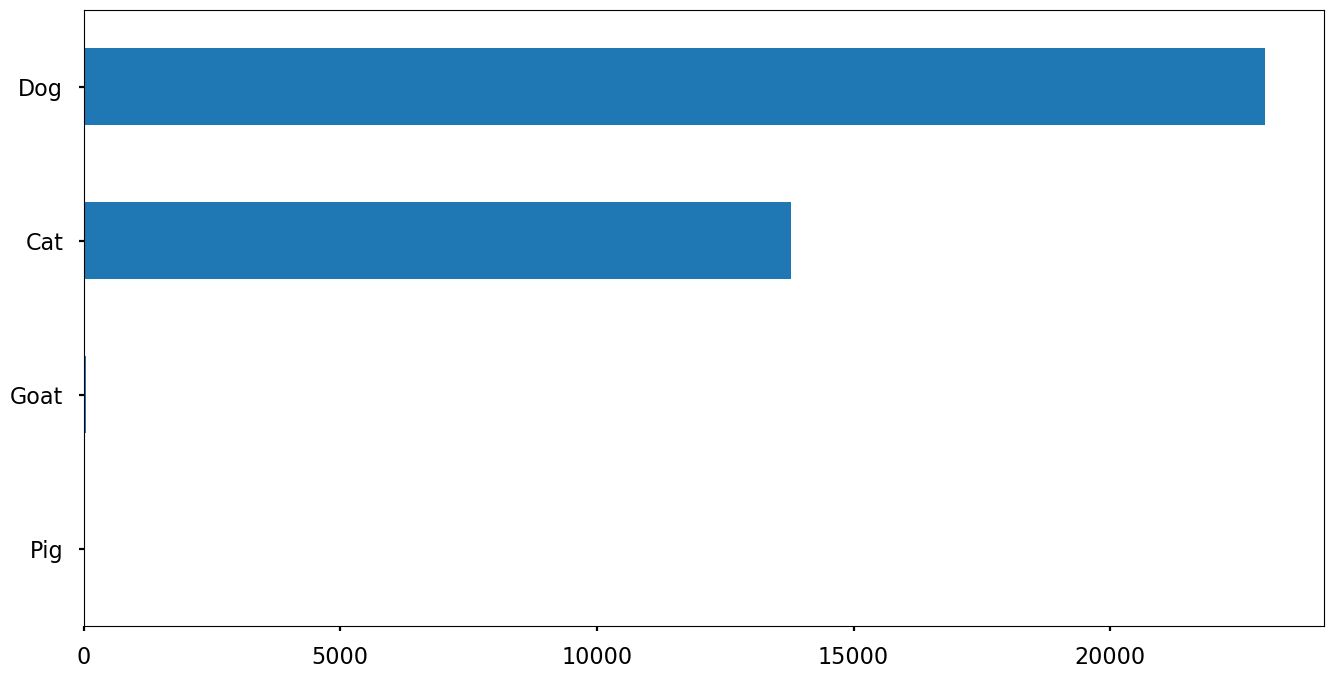

In [128]:
df.Species.value_counts(ascending=True).plot.barh(figsize=(16,8))

## Remarkable names

In [20]:
pd.set_option('max_colwidth', 100)

In [21]:
df[~df["Animal's Name"].isna() & df["Animal's Name"].str.split().str.len().ge(5)][["Animal's Name","Species","Primary Breed"]]

,Animal's Name,Species,Primary Breed
1685,Flash Gordon Savior of the Universe,Dog,Catahoula Leopard dog
1754,Ali (Alejandra Beyonce The Great),Dog,Korean Jindo
4360,"His Royal Highness, the Duke of Tacoma",Dog,"Terrier, American Staffordshire"
11439,Commandant Boomer Kim The Dog,Dog,Shepherd
14131,"Smoky Mountain Koda Bear (""Koda"")",Dog,Alaskan Malamute
15986,Lady G Lolo Paloma MacGuffie Hunter,Cat,Domestic Medium Hair
15987,Morris Boney T MacGuffie Hunter,Cat,Domestic Medium Hair
16988,King Charles Leon the First aka Chuck,Cat,Maine Coon
17108,Jazzmine Primula Rosamund the Fair,Cat,British Shorthair
17332,Her Ladyship Princess Penelope Peachfuzz Howe,Cat,Domestic Shorthair


## Most common breeds and mixes

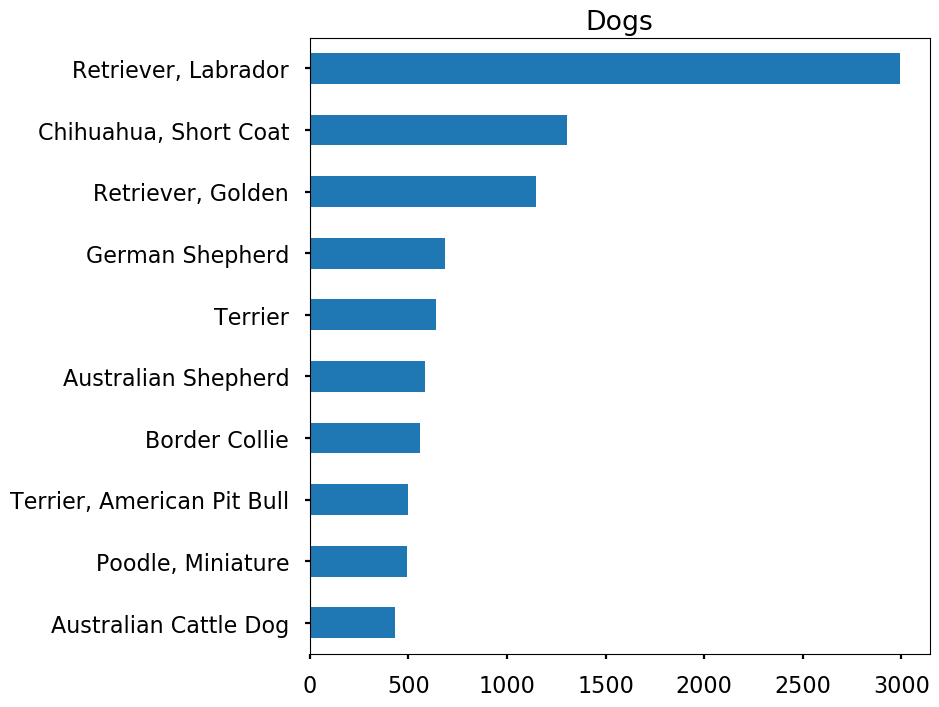

In [135]:
df[df.Species.eq('Dog')]['Primary Breed'].value_counts(ascending=True).tail(10).plot.barh(figsize=(8,8), title='Dogs')

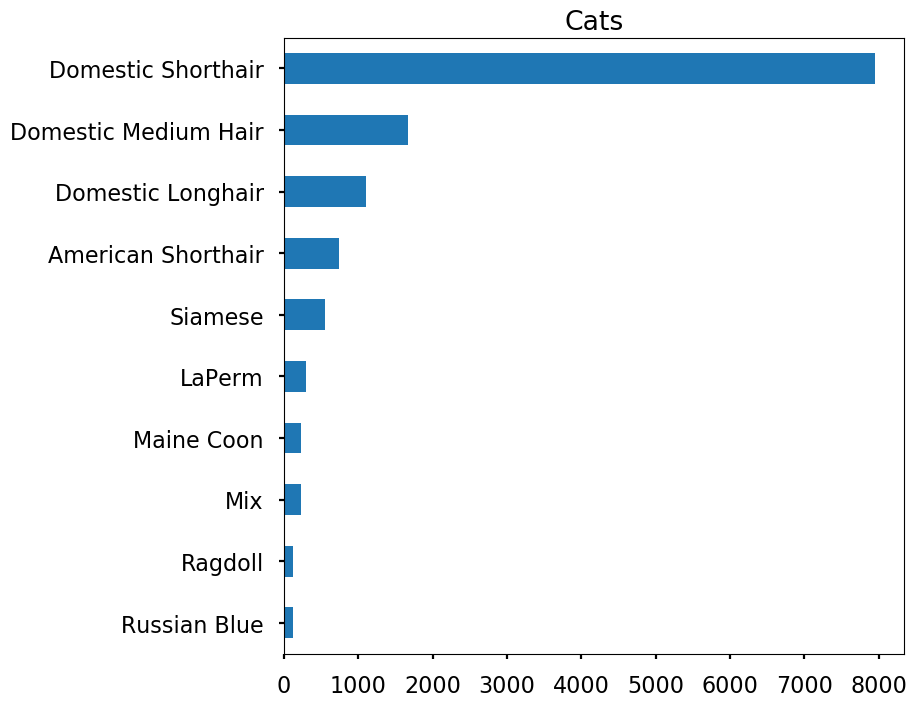

In [136]:
df[df.Species.eq('Cat')]['Primary Breed'].value_counts(ascending=True).tail(10).plot.barh(figsize=(8,8), title='Cats')

In [38]:
mix = df[df.Species.eq('Dog') & df['Secondary Breed'].ne('Mix')].groupby(['Primary Breed', 'Secondary Breed']).size()
mix.sort_values(ascending=False).head(20).unstack().fillna(0).astype(int).style.background_gradient(axis=None, cmap='binary')

Secondary Breed,"Poodle, Standard","Poodle, Miniature",Border Collie,Terrier,"Dachshund, Standard Smooth Haired","Retriever, Labrador","Retriever, Golden",German Shepherd,Australian Shepherd,Beagle,Miniature Pinscher,"Chihuahua, Short Coat"
Primary Breed,,,,,,,,,,,,
"Retriever, Labrador",353,77,77,0,0,0,48,44,0,0,0,0
"Retriever, Golden",222,65,0,0,0,0,0,0,0,0,0,0
"Spaniel, American Cocker",0,82,0,0,0,0,0,0,0,0,0,0
"Chihuahua, Short Coat",0,0,0,72,62,0,0,0,0,0,42,0
"Schnauzer, Miniature",0,60,0,0,0,0,0,0,0,0,0,0
Maltese,0,59,0,0,0,0,0,0,0,0,0,0
"Poodle, Standard",0,0,0,0,0,50,49,0,0,0,0,0
Border Collie,0,0,0,0,0,49,0,0,43,0,0,0
Pug,0,0,0,0,0,0,0,0,0,43,0,0


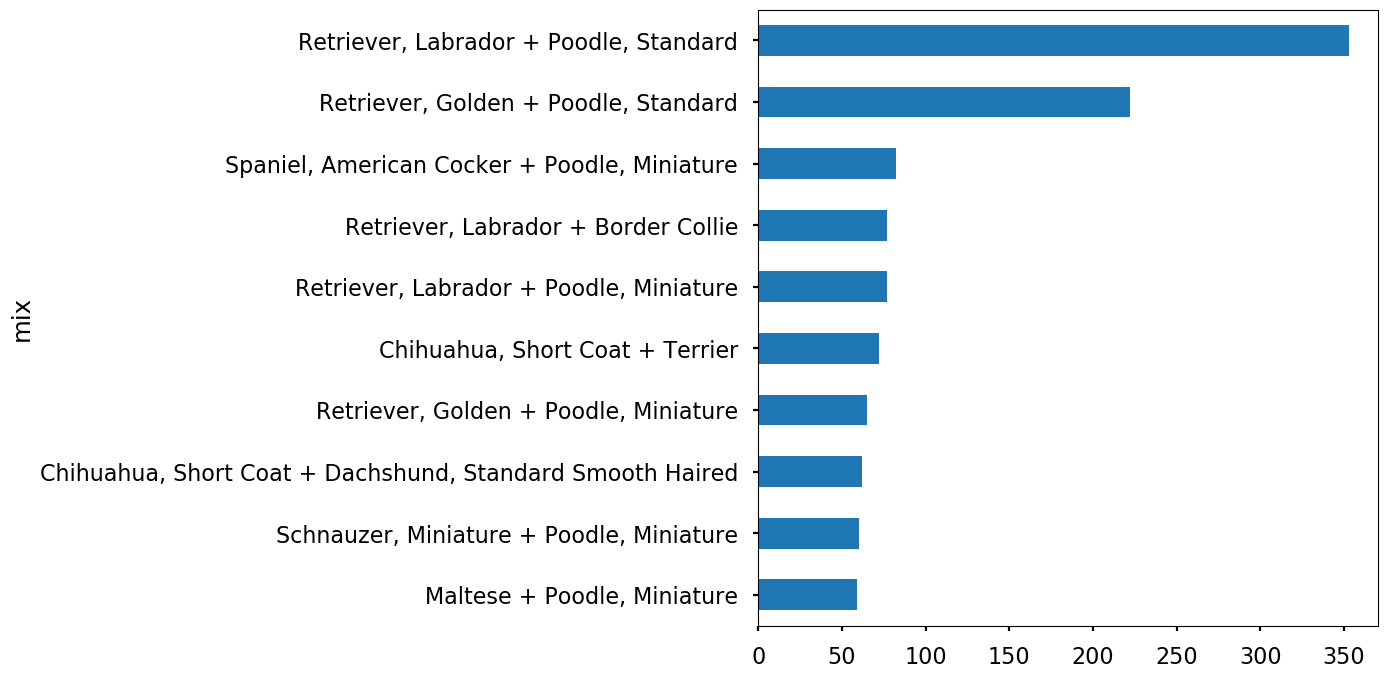

In [157]:
mix2 = mix.sort_values(ascending=True).reset_index()
mix2['mix']=mix2['Primary Breed'] + ' + ' + mix2['Secondary Breed']
mix2.set_index('mix').tail(10).plot.barh(figsize=(8,8), legend=None)

## Dog names

In [240]:
df['last_letter'] = df["Animal's Name"].str.split().str[0].str[-1].astype(str).apply(unidecode.unidecode).str.lower()

In [241]:
freq = df[df.Species.isin(['Cat','Dog']) & df.last_letter.isin(list(string.ascii_lowercase))]\
  .groupby(['Species','last_letter']).size().unstack('Species')
freq = freq.div(freq.sum(0),1).sort_values('Dog', ascending=False)

(0, 0.1820873362445415)

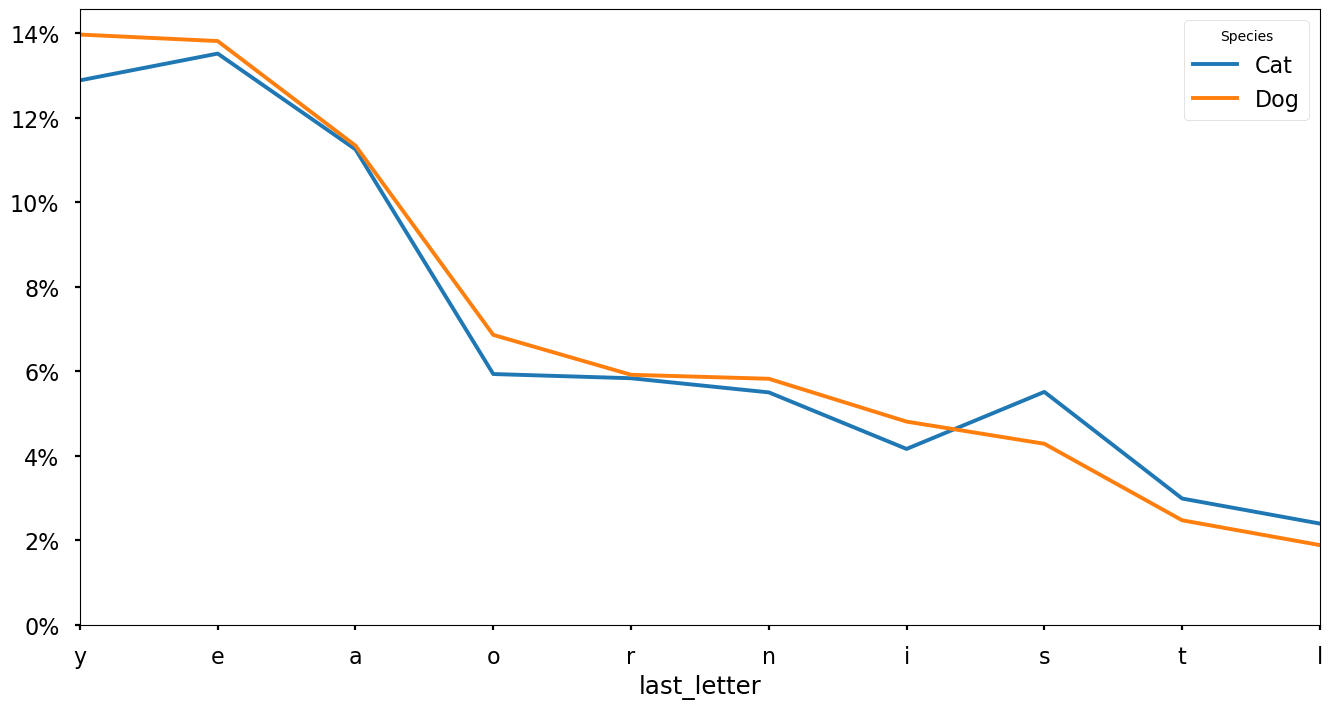

In [242]:
ax = freq.head(10).plot(figsize=(16,8))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_ylim(0)

## Compare to baby names

In [206]:
baby = pd.read_csv(r'C:\Users\fxp\Downloads\names\yob2018.txt', header=None, names=['name','sex','count'])

In [208]:
baby['last_letter']=baby.name.str[-1].astype(str).apply(unidecode.unidecode).str.lower()

In [243]:
freq_b = baby[baby.last_letter.isin(list(string.ascii_lowercase))].groupby(['last_letter','sex'])['count'].sum().unstack('sex')
freq_b['humans']=freq_b.M+freq_b.F
freq_b = freq_b.div(freq_b.sum(0),1)

In [244]:
freq = pd.merge(freq, freq_b, left_index=True, right_index=True)

(0, 0.40260207556665506)

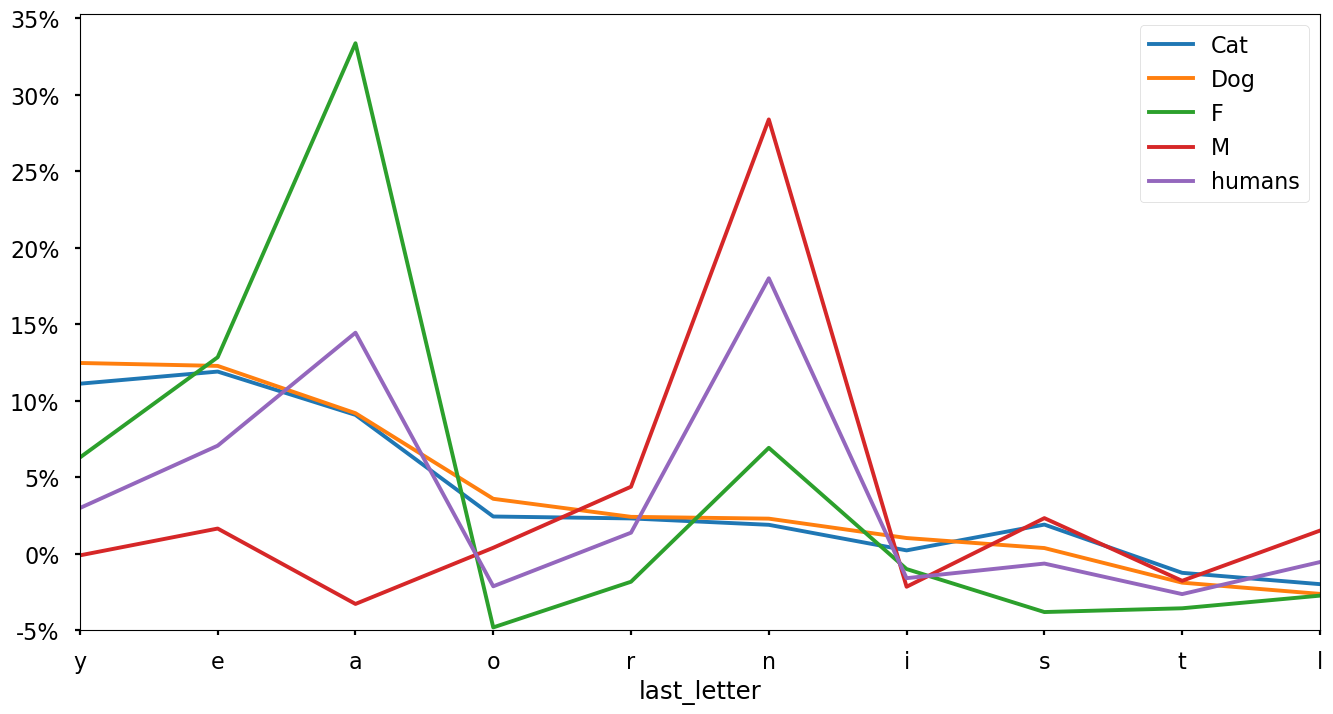

In [245]:
ax = freq.head(10).plot(figsize=(16,8))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_ylim(0)

## Biggest gaps dogs vs. cats

In [247]:
freq['ratio']=freq['Dog']/freq['Cat']-1
freq['delta']=freq['Dog']-freq['Cat']

[Text(0, 0, '-2.0%'),
 Text(0, 0, '-1.5%'),
 Text(0, 0, '-1.0%'),
 Text(0, 0, '-0.5%'),
 Text(0, 0, '0.0%'),
 Text(0, 0, '0.5%'),
 Text(0, 0, '1.0%'),
 Text(0, 0, '1.5%'),
 Text(0, 0, '2.0%')]

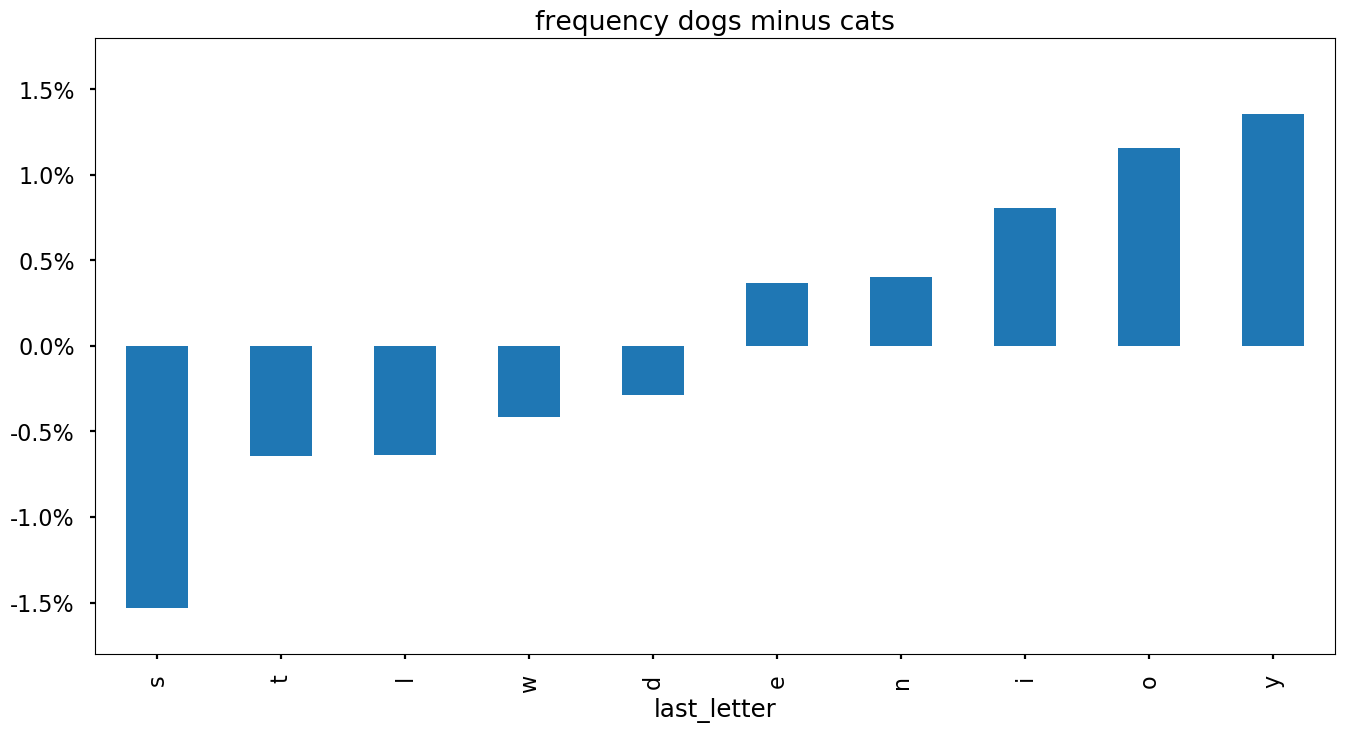

In [249]:
freq2 = freq.sort_values(by='delta')
ax = pd.concat([freq2.head(5),freq2.tail(5)]).delta.plot.bar(figsize=(16,8), title='frequency dogs minus cats')
ax.set_ylim(-0.018, 0.018)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

In [251]:
df[df.Species.eq('Dog') & df.last_letter.isin(['o'])]["Animal's Name"].value_counts().head(10)

Juno     26
Leo      26
Milo     26
Coco     25
Bruno    22
Otto     22
Theo     22
Hugo     20
Oreo     19
Gizmo    18
Name: Animal's Name, dtype: int64

In [235]:
df[df.Species.eq('Cat') & df.last_letter.isin(['s','t'])]["Animal's Name"].value_counts().head(10)

Scout       16
Boots       15
Peanut      14
Bandit      13
Princess    13
Rufus       12
Artemis     12
Cat         12
Boris       12
Midnight    12
Name: Animal's Name, dtype: int64

## Common names

In [58]:
names = df[df.Species.isin(['Cat','Dog'])].groupby(["Animal's Name",'Species']).size().unstack('Species').dropna()
names['both'] = names.min(1)
names.sort_values('both', ascending=False).astype(int).head(10)

Species,Cat,Dog,both
Animal's Name,,,
Lucy,27,28,27
Lily,26,27,26
Oliver,25,26,25
Bella,24,31,24
Lola,24,25,24
Luna,24,28,24
Leo,24,26,24
Sophie,23,26,23
Charlie,23,31,23


In [64]:
names['delta'] = names['Dog']-names['Cat']
names.sort_values('delta', ascending=False).astype(int).head(20)

Species,Cat,Dog,both,delta
Animal's Name,,,,
Bentley,5,25,5,20
Jax,2,21,2,19
Riley,9,28,9,19
Cooper,10,29,10,19
Rusty,6,24,6,18
Louie,9,27,9,18
Bodhi,4,22,4,18
Cody,4,22,4,18
Bruno,5,22,5,17


In [63]:
names.sort_values('delta', ascending=True).astype(int).head(20)

Species,Cat,Dog,both,delta
Animal's Name,,,,
Tigger,21,1,1,-20
Kitty,18,5,5,-13
Cat,12,2,2,-10
Pumpkin,17,7,7,-10
Tiger,17,7,7,-10
Boots,15,5,5,-10
Sylvester,11,2,2,-9
Spooky,10,1,1,-9
Midnight,12,3,3,-9


## Names by breed

In [259]:
top_breeds = df[df.Species.eq('Dog') & df.last_letter.isin(list(string.ascii_lowercase))]['Primary Breed'].value_counts().head(10)
top_breeds

Retriever, Labrador           2980
Chihuahua, Short Coat         1296
Retriever, Golden             1139
German Shepherd                683
Terrier                        634
Australian Shepherd            582
Border Collie                  558
Terrier, American Pit Bull     495
Poodle, Miniature              494
Australian Cattle Dog          432
Name: Primary Breed, dtype: int64

In [253]:
freq2 = df[df.Species.eq('Dog') & df.last_letter.isin(list(string.ascii_lowercase))]\
  .groupby(['Primary Breed','last_letter']).size().unstack('Primary Breed')
freq2 = freq2.loc[:,freq2.sum(0)>500]
freq2 = freq2.div(freq2.sum(0),1).sort_values('Retriever, Labrador', ascending=False)

[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%')]

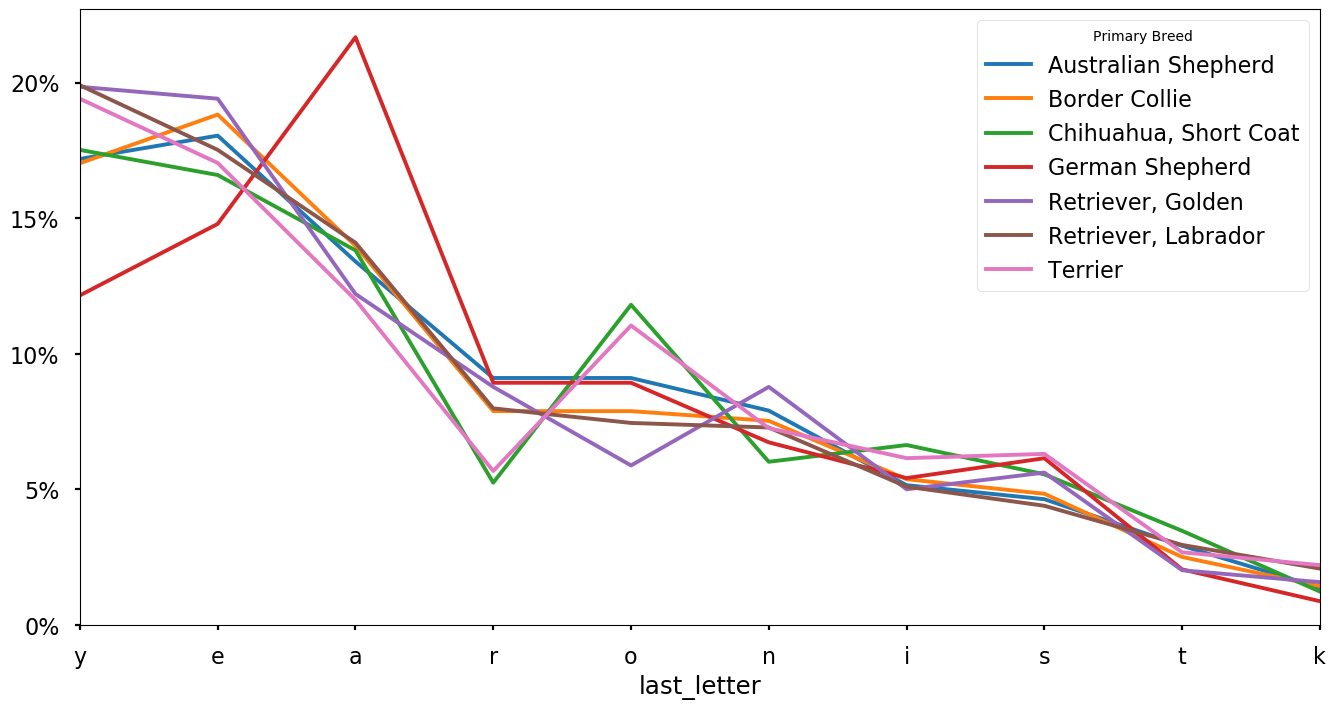

In [257]:
ax = freq2.head(10).plot(figsize=(16,8))
ax.set_ylim(0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

In [280]:
(a,o) = df[df.Species.eq('Dog') & df.last_letter.isin(['a','o'])]\
  .groupby(['last_letter']).size().sort_index()

[Text(0, 0, '0%'),
 Text(0, 0, '20%'),
 Text(0, 0, '40%'),
 Text(0, 0, '60%'),
 Text(0, 0, '80%'),
 Text(0, 0, '100%')]

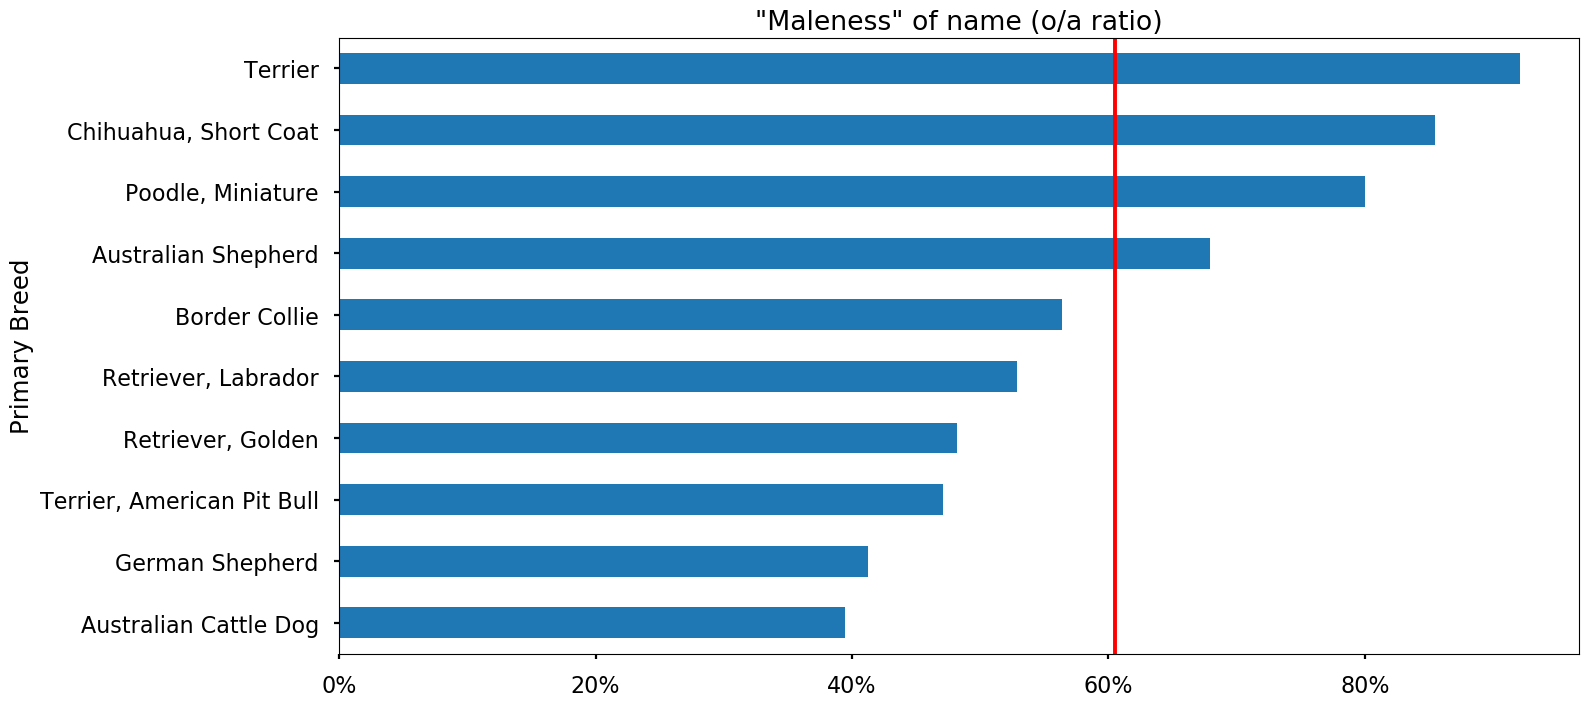

In [282]:
freq3 = df[df.Species.eq('Dog') & df.last_letter.isin(['a','o']) & df['Primary Breed'].isin(top_breeds.index)]\
  .groupby(['Primary Breed','last_letter']).size().unstack('last_letter')
freq3['ratio'] = freq3.o/freq3.a
ax = freq3.ratio.sort_values(ascending=True).plot.barh(figsize=(16,8), title='"Maleness" of name (o/a ratio)')
ax.axvline(o/a, c='red')
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])